# Titanic Survival Model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marcellinus-witarsah/dataScienceMiniProjects/blob/main/TitanicSurvivalModel/Titanic%20Third.ipynb)


![titanic_image](https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)


This Project is aimed to create a model which can predict if a passenger survived a Titanic accident based on their data which consist of:
1.  PassengerId  (int64)  
2.  Survived     (int64)  
3.  Pclass       (int64)
4.  Name         (object)
5.  Sex          (object)
6.  Age          (float64)
7.  SibSp        (int64) 
8.  Parch        (int64)
9.  Ticket       (object) 
10. Fare         (float64)
11. Cabin        (object) 
12. Embarked     (object)

The outline of this project will consists of:
1. Data Preparation
2. Exploratory Data Analysis
3. Data Preprocessing and Feature Engineering
4. Modelling
5. Evaluation
6. Submission to Kaggle.

This project is based on competition being held on Kaggle which can be access using this link https://www.kaggle.com/c/titanic.





# Data Preparation
The data it self can be downloaded from Kaggle using which can be accessed using this link https://www.kaggle.com/c/titanic/data. But, the data had already been provided from my Github, therefore the link of the raw data already provided which can be accessed using pandas library. These are the links for:
1. Train data ('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/train.csv')
2. Test data ('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/test.csv')

In [73]:
import pandas as pd
import numpy as np
import math

In [103]:
# data frame for original data
titanic_train_ori = pd.read_csv('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/train.csv')
titanic_test_ori = pd.read_csv('https://raw.githubusercontent.com/marcellinus-witarsah/dataScienceMiniProjects/main/TitanicSurvivalModel/test.csv')

# data frame from editing
titanic_train = titanic_train_ori.copy()
titanic_test = titanic_test_ori.copy()
titanic_train['train_test'] = 0
titanic_test['train_test'] = 1

titanic_all_ori = pd.concat([titanic_train, titanic_test]) 
titanic_all = titanic_all_ori.copy()

pd.set_option('display.max_rows', titanic_train.shape[0])

In [75]:
# check the train data
display(titanic_train.info())
display(titanic_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0


There 3 columns in training data that contains missing data which are Age, Cabin and Embarked.

In [76]:
# check the test data
display(titanic_test.info())
display(titanic_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare,train_test
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.0
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1.0
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.0
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.0
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,1.0
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.0
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.0
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.0


There 3 columns in testing data that contains missing data which are Age, Fare, and Cabin.

In [77]:
# separate data columns that is numeric and categorical
titanic_train_num = ['Age', 'SibSp', 'Parch', 'Fare']
titanic_train_cat = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [78]:
# check percentage of missing values for training data 
missing_values = ['Age', 'Cabin', 'Embarked']
dict = {'ColumnName': [], 'MissingVals': [], '%': []}

for i in missing_values:
    dict['ColumnName'].append(i)
    dict['MissingVals'].append(titanic_train[i].isna().sum())
    dict['%'].append(titanic_train[i].isnull().sum()/len(titanic_train)*100)

df_missing_values=pd.DataFrame(dict)
df_missing_values

,ColumnName,MissingVals,%
0,Age,177,19.865320
1,Cabin,687,77.104377
2,Embarked,2,0.224467


In [79]:
# check percentage of missing values for test data 
missing_values = ['Age', 'Fare', 'Cabin']
dict = {'ColumnName': [], 'MissingVals': [], '%': []}

for i in missing_values:
    dict['ColumnName'].append(i)
    dict['MissingVals'].append(titanic_test[i].isna().sum())
    dict['%'].append(titanic_test[i].isna().sum()/len(titanic_test)*100)

df_missing_values=pd.DataFrame(dict)
df_missing_values

,ColumnName,MissingVals,%
0,Age,86,20.574163
1,Fare,1,0.239234
2,Cabin,327,78.229665


We might be considering to drop 'Cabin' Column because there's so many missing values about 77% (train) and 78% (test).

# Dealing with Missing Data



In [84]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Age
Before starting, there are some missing data that needs to be handled. Therefore it must be filled with mean of age from based on each Sex and Pclass.


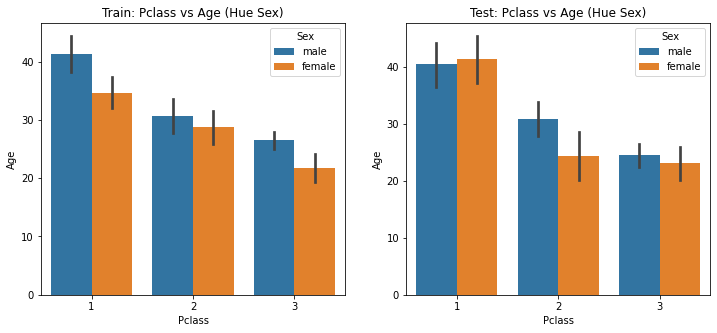

In [104]:
fig, ax = plt.subplots(figsize=(12,5), ncols=2)
ax[0].set_title('Train: Pclass vs Age (Hue Sex)')
sns.barplot(x='Pclass', 
            y='Age',
            hue='Sex', 
            data=titanic_train,
            ax=ax[0])

ax[1].set_title('Test: Pclass vs Age (Hue Sex)')
sns.barplot(x='Pclass', 
            y='Age',
            hue='Sex',
            data=titanic_test,
            ax=ax[1])
plt.show()

It can be seen that there are difference in age between each Pclass and Sex. Missing Age might be dealed by filling it with mean age based on Sex and Pclass

In [105]:
pd.pivot_table(index=['Pclass'], 
               columns=['train_test', 'Sex'], 
               data=titanic_all, 
               values='Age', 
               aggfunc='mean') 

train_test          0                     1           
Sex            female       male     female       male
Pclass                                                
1           34.611765  41.281386  41.333333  40.520000
2           28.722973  30.740707  24.376552  30.940678
3           21.750000  26.507589  23.073400  24.525104

Fill this to the missing Age columnn in train and test data

In [106]:
train_age_isna = titanic_train.isna()['Age']
train_bool_male = titanic_train['Sex'] == 'male'
train_bool_female = titanic_train['Sex'] == 'female'
train_bool_pclass1 = titanic_train['Pclass'] == 1
train_bool_pclass2 = titanic_train['Pclass'] == 2
train_bool_pclass3 = titanic_train['Pclass'] == 3

# filling Age in train data
# male
titanic_train.loc[train_bool_male & train_bool_pclass1 & train_age_isna, 'Age'] = 41.28
titanic_train.loc[train_bool_male & train_bool_pclass2 & train_age_isna, 'Age'] = 30.70
titanic_train.loc[train_bool_male & train_bool_pclass3 & train_age_isna, 'Age'] = 26.50
# female
titanic_train.loc[train_bool_female & train_bool_pclass1 & train_age_isna, 'Age'] = 34.61
titanic_train.loc[train_bool_female & train_bool_pclass2 & train_age_isna, 'Age'] = 28.72
titanic_train.loc[train_bool_female & train_bool_pclass3 & train_age_isna, 'Age'] = 21.75


test_age_isna = titanic_test.isna()['Age']
test_bool_male = titanic_test['Sex'] == 'male'
test_bool_female = titanic_test['Sex'] == 'female'
test_bool_pclass1 = titanic_test['Pclass'] == 1
test_bool_pclass2 = titanic_test['Pclass'] == 2
test_bool_pclass3 = titanic_test['Pclass'] == 3
# filling Age in test data
# male
titanic_test.loc[test_bool_male & test_bool_pclass1 & test_age_isna, 'Age'] = 40.52
titanic_test.loc[test_bool_male & test_bool_pclass2 & test_age_isna, 'Age'] = 30.94
titanic_test.loc[test_bool_male & test_bool_pclass3 & test_age_isna, 'Age'] = 24.52
# female
titanic_test.loc[test_bool_female & test_bool_pclass1 & test_age_isna, 'Age'] = 41.33
titanic_test.loc[test_bool_female & test_bool_pclass2 & test_age_isna, 'Age'] = 24.37
titanic_test.loc[test_bool_female & test_bool_pclass3 & test_age_isna, 'Age'] = 23.07


## Cabin

For Cabin We might consider dropping it latter in Feature Engineering Section because the missing data is to much (**above 75%** missing for either train and test data)

There might be an alternative which is we can just fill it based on fare. 

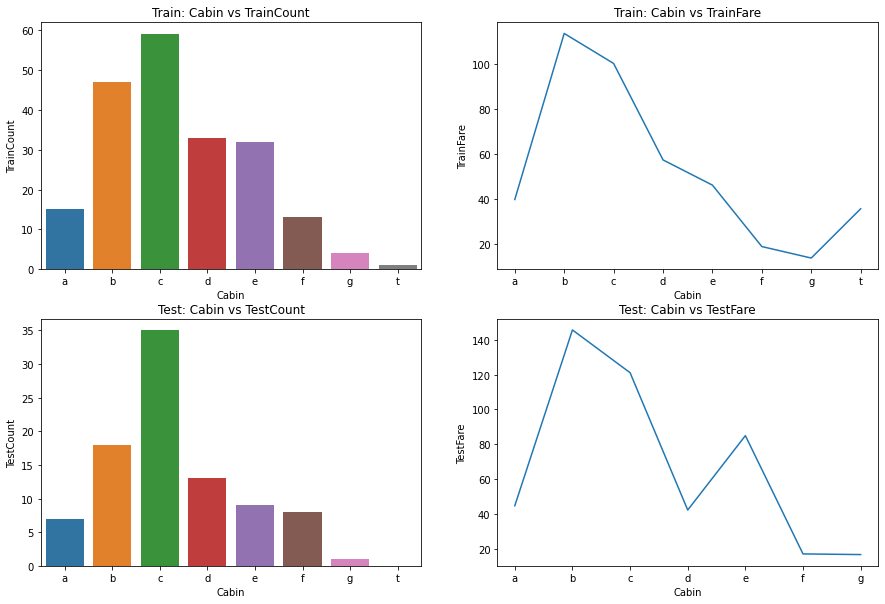

In [107]:
# Replace Nan or missing value with 'N' first
titanic_train.loc[titanic_train['Cabin'].isna(), 'Cabin'] = 'N'
titanic_test.loc[titanic_test['Cabin'].isna(), 'Cabin'] = 'N'

# Adding new feature column with first letter in that Cabin Column
titanic_train['CabinCode'] = titanic_train['Cabin'].apply(lambda x: str(x).split(' ')[0][0]).str.lower()
titanic_test['CabinCode'] = titanic_test['Cabin'].apply(lambda x: str(x).split(' ')[0][0]).str.lower()

# mean fare for each Cabin
train_cabin_fare = titanic_train.groupby('CabinCode')['Fare'].mean()
test_cabin_fare = titanic_test.groupby('CabinCode')['Fare'].mean()

# count for each Cabin
train_cabin_count = titanic_train.groupby('CabinCode')['Fare'].count()
test_cabin_count = titanic_test.groupby('CabinCode')['Fare'].count()

# datafram full of train and test mean and count
cabin_count_fare = pd.concat(objs=[train_cabin_count, test_cabin_count, 
                                   train_cabin_fare, test_cabin_fare], 
                             keys=['TrainCount', 'TestCount', 
                                   'TrainFare', 'TestFare'], 
                             axis=1)
cabin_count_fare['Cabin'] = train_cabin_count.index

# Exclued cabin n (n=missing_value)
cabin_count_fare_exclude_cabin_n = cabin_count_fare[cabin_count_fare['Cabin']!='n'] 


fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
# Cabin vs TrainCount/ TestCount
ax[0][0].set_title('Train: Cabin vs TrainCount')
sns.barplot(x='Cabin',
            y='TrainCount',
            data=cabin_count_fare_exclude_cabin_n,
            ax=ax[0][0])

ax[1][0].set_title('Test: Cabin vs TestCount')
sns.barplot(x='Cabin',
            y='TestCount', 
            data=cabin_count_fare_exclude_cabin_n,
            ax=ax[1][0])

# Cabin vs TrainCount/ TestCount
ax[0][1].set_title('Train: Cabin vs TrainFare')
sns.lineplot(x='Cabin',
            y='TrainFare',
            data=cabin_count_fare_exclude_cabin_n,
            ax=ax[0][1])

ax[1][1].set_title('Test: Cabin vs TestFare')
sns.lineplot(x='Cabin',
            y='TestFare', 
            data=cabin_count_fare_exclude_cabin_n,
            ax=ax[1][1])

plt.show()



In [90]:
cabin_count_fare

,TrainCount,TestCount,TrainFare,TestFare,Cabin
a,15,7.0,39.623887,44.716657,a
b,47,18.0,113.505764,145.562733,b
c,59,35.0,100.151341,121.033460,c
d,33,13.0,57.244576,42.251277,d
e,32,9.0,46.026694,84.921756,e
f,13,8.0,18.696792,17.076050,f
g,4,1.0,13.581250,16.700000,g
n,687,326.0,19.157325,19.080828,n
t,1,NaN,35.500000,NaN,t


Rather than filling cabin value according to fare. Create a new feature column 'HasCabin' because the data is collected after accident. If the value of 'HasCabin' is 0 that means that the passenger is dead because he can't report where the location of his cabin.

In [91]:
titanic_train['HasCabin'] = titanic_train['Cabin']\
                            .apply(lambda x: 0 if str(x)== 'N' else 1)


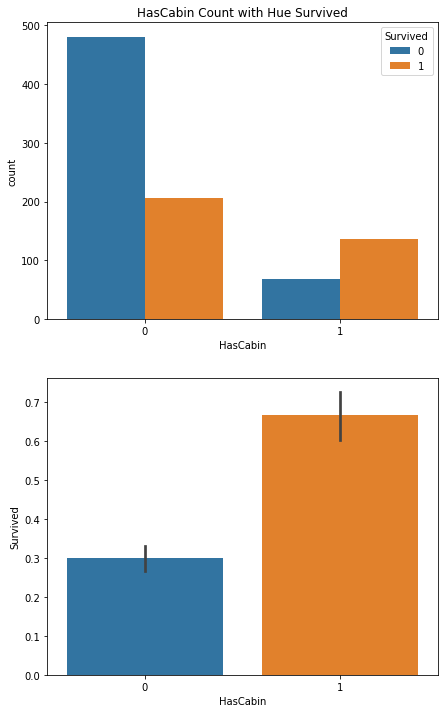

In [92]:
fig, ax = plt.subplots(figsize=(7,12), nrows=2)
ax[0].set_title('HasCabin Count with Hue Survived')
sns.countplot(x='HasCabin', hue='Survived',
              data=titanic_train, ax=ax[0])

ax[1].set_title('')
sns.barplot(x='HasCabin', y='Survived', data=titanic_train, ax=ax[1])
plt.show()


As shown above people that HasCabin value equals 1 has higher chance of surviving the titanic.

## Embarked
Data that has missing value on Embarked column is on the train data. We can just need to replace it with data that is frequent on the column which is 'S' but we might have a chance of filling with a wrong value because embarked mean where the traveler got on board from. There might be a correlation between Fare and the location (Embarked) the passenger embarked and of course Pclass (represents socio-economic status or SES).

We only need to find out the price (per person) to compare with other prices (per person) to allocate the missing embarked port.

In [96]:
# if titanic_train['Embarked'].isna().sum() > 0:
  # titanic_train.loc[titanic_train['Embarked'].isna(), 'Embarked'] = 'Titanic (train) embarked', titanic_train['Embarked'].mode()[0]

In [139]:
# titanic_train[titanic_train['Embarked'].isna()]
# titanic_train.groupby('SibSp', 'PClass')['Fare'].mean()
# titanic_train.groupby('SibSp')['Fare'].min()
# titanic_train.groupby('SibSp')['Fare'].max()
# titanic_train.groupby('SibSp')['Fare'].median()
display("Train Dataset", pd.pivot_table(data=titanic_train, 
               index='Pclass', 
               columns=['Embarked', 'SibSp'], 
               values='Fare', 
               aggfunc='mean'))

display(pd.pivot_table(data=titanic_train, 
               index='Pclass', 
               columns=['Embarked', 'SibSp'], 
               values='Fare', 
               aggfunc='median'))


display("Test Dataset", pd.pivot_table(data=titanic_test, 
               index='Pclass', 
               columns=['Embarked', 'SibSp'], 
               values='Fare', 
               aggfunc='mean'))

display(pd.pivot_table(data=titanic_test, 
               index='Pclass', 
               columns=['Embarked', 'SibSp'], 
               values='Fare', 
               aggfunc='median'))

'Train Dataset'

Embarked           C                         ...          S             
SibSp              0          1           2  ...          4     5      8
Pclass                                       ...                        
1         104.368635  94.144646  262.375000  ...        NaN   NaN    NaN
2          17.089886  31.146250         NaN  ...        NaN   NaN    NaN
3           9.641849  13.833900   19.863525  ...  32.635714  46.9  69.55

[3 rows x 14 columns]

Embarked        C                          Q  ...         S                      
SibSp           0         1         2      0  ...         3        4     5      8
Pclass                                        ...                                
1         61.9792  86.13125  262.3750    NaN  ...  263.0000      NaN   NaN    NaN
2         13.8625  30.07080       NaN  12.35  ...   21.0000      NaN   NaN    NaN
3          7.2292  14.45420   19.2583   7.75  ...   25.4667  31.3875  46.9  69.55

[3 rows x 14 columns]

'Test Dataset'

Embarked          C                        ...          S             
SibSp             0           1         2  ...          4     5      8
Pclass                                     ...                        
1         95.154670  125.528977  262.3750  ...        NaN   NaN    NaN
2         14.451771   30.040625       NaN  ...        NaN   NaN    NaN
3          7.867436   14.237500   21.6792  ...  23.516667  46.9  69.55

[3 rows x 14 columns]

Embarked        C                             Q  ...        S                      
SibSp           0         1         2         0  ...        3        4     5      8
Pclass                                           ...                               
1         61.9792  94.79165  262.3750       NaN  ...  263.000      NaN   NaN    NaN
2         15.0333  32.36250       NaN  11.52915  ...      NaN      NaN   NaN    NaN
3          7.2292  14.45830   21.6792   7.75000  ...   21.075  31.3875  46.9  69.55

[3 rows x 14 columns]

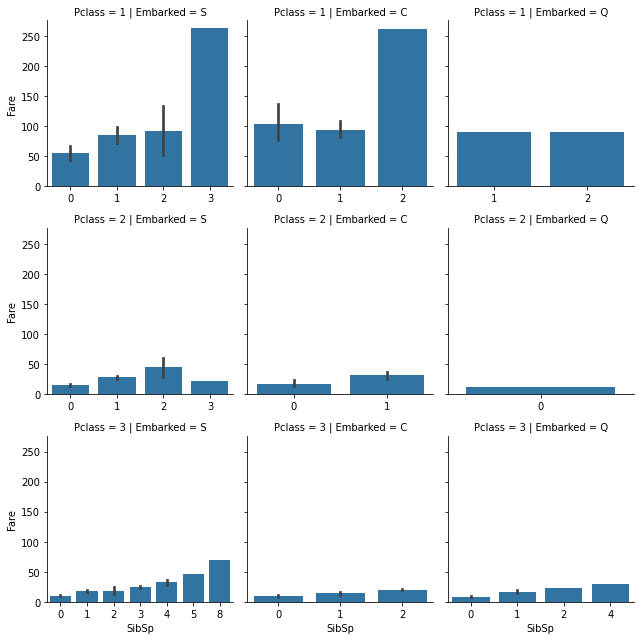

In [144]:
facet_grid_1 = sns.FacetGrid(data=titanic_train, row='Pclass', col='Embarked', sharex=False)
facet_grid_1.map_dataframe(sns.barplot, x='SibSp', y='Fare')

As we can see the Fare is getting highe when passengers travelling in groups. Which indicates that their ticket is included for their siblings, spouse, etc.

## Fare
Simply fill it with mean of fare with the median where the passenger embarked

In [116]:
titanic_test_ori[titanic_test_ori['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [113]:
if titanic_test['Fare'].isna().sum() > 0:
  titanic_test.loc[titanic_test['Fare'].isna(), 'Fare'] = titanic_test[titanic_test_ori['Embarked']=='S']['Fare'].median()

In [117]:
titanic_test[titanic_test_ori['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,CabinCode
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.775,N,S,1,n


In [118]:
print(titanic_train.info())
print(titanic_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
 13  CabinCode    891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ---

# Exploratory Data Analysis
This section contains data visualization and analysis to gain insights and characteristics of the data.

## Plot Data That are Numeric

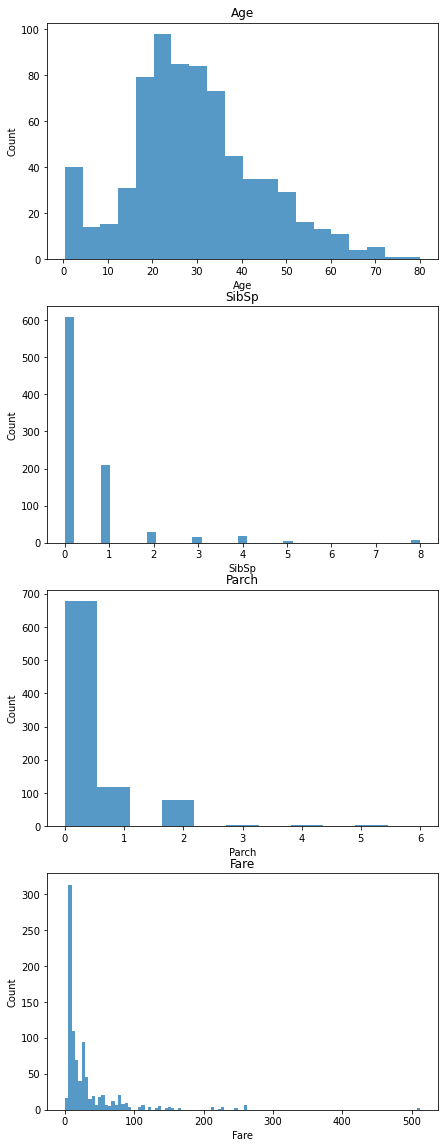

In [ ]:
fig, ax = plt.subplots(nrows=len(titanic_train_num), figsize=[7, len(titanic_train_num)*5])

for i, col in enumerate(titanic_train_num):
    sns.histplot(titanic_train[col], linewidth=0, ax=ax[i])
    ax[i].set_title(col)
plt.show()

Based on the distribution of the data we can see that 'SibSp', 'Parch', and 'Fare' columns are are right skewed. This probem will be solved using scaling or normalization to decrease the standard deviation as well which affect our model if we didn't do so.

## Plot Data That are Categorical
The main reason is to see whether there are any categorical variables that needs feature engineering.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

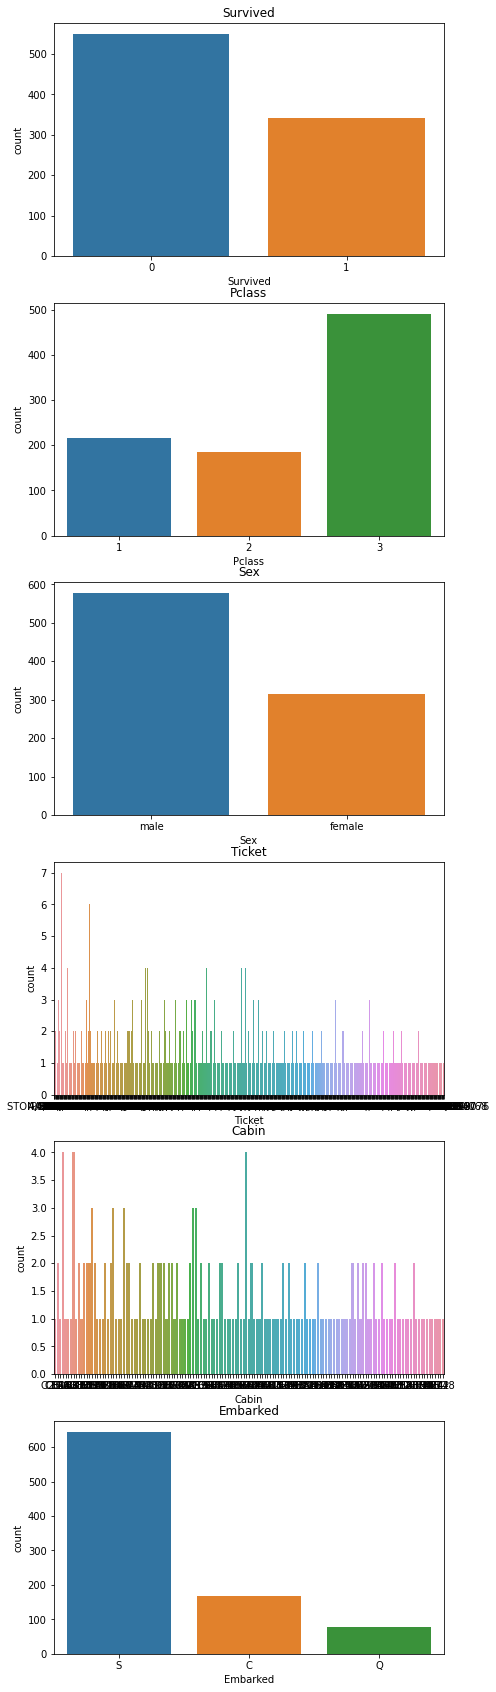

In [ ]:
fig, ax = plt.subplots(nrows=len(titanic_train_cat), figsize=[7, len(titanic_train_cat)*5])

for i, col in enumerate(titanic_train_cat):
    sns.countplot(titanic_train[col], linewidth=0, ax=ax[i])
    ax[i].set_title(col)
plt.show()

Cabin and Ticket Columns need feature engineering because the data is too vary for the machine or even humans to interpret.

## Plot Other Feature
This part is for finding which feature that correlates to the survivality

### Count Plot Survival Based On Sex

,Survived
Sex,
female,0.742038
male,0.188908


Male Survived Percentage 12.23 %
Male Not Survived Percentage 52.53 %

Female Survived Percentage 26.15 %
Female Not Survived Percentage 9.091 %


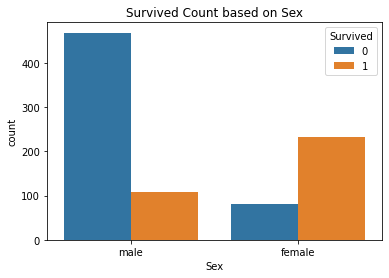

In [ ]:
# Plot counting survival based on sex

sns.countplot(x='Sex', hue='Survived', data=titanic_train)\
              .set(title='Survived Count based on Sex')


# male and female survivability compare to each own gender

# (percentage how many female survived from all female passengers)
# female_percentage = female_survived.sum / female_passengers.count 

# (percentage how many male survived from all male passengers)
# male_percentage = male_survived.sum / female_passengers.count

display(pd.pivot_table(data=titanic_train,
               index='Sex',
               aggfunc={'Survived': np.mean}))

# male and female survivability percentage based compare to all passengers 
len_data = len(titanic_train)

bool_survived = titanic_train['Survived'] == 1
bool_not_survived = titanic_train['Survived'] == 0

bool_male = titanic_train['Sex'] == 'male'
bool_female = titanic_train['Sex'] == 'female'

bool_male_survived = titanic_train.loc[bool_survived & bool_male]
bool_male_not_survived = titanic_train.loc[bool_not_survived & bool_male]

bool_female_survived = titanic_train.loc[bool_survived & bool_female]
bool_female_not_survived = titanic_train.loc[bool_not_survived & bool_female]

# (percentage how many male survived from all passengers)
print('Male Survived Percentage', '{0:.4g}'.format(len(bool_male_survived)/len_data*100), '%')
# (percentage how many male not survived from all passengers)
print('Male Not Survived Percentage', '{0:.4g}'.format(len(bool_male_not_survived)/len_data*100), '%\n')
# (percentage how many female survived from all passengers)
print('Female Survived Percentage', '{0:.4g}'.format(len(bool_female_survived)/len_data*100), '%')
# (percentage how many female not survived from all passengers)
print('Female Not Survived Percentage', '{0:.4g}'.format(len(bool_female_not_survived)/len_data*100), '%')



From the plot, we can conclude that female has a higher chance of surviving in the titanic accident.

**From female passenger** *74,2%* survived the accident rather than **all male** which has a percentage of *18%*.

**From all passengers**:
1. *12.23%* of passengers which are **male survived**
1. *52.53%* of passengers which are **male not survived**
1. *26.15%* of passengers which are **female survived**
1. *9.09%* of passengers which are **female not survived**


### Heat Map Survived vs Pclass Columns

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


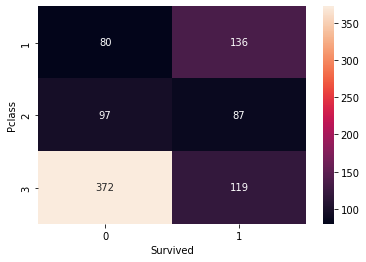

In [ ]:
# Create a heat map Survived vs Pclass Columns
grouped_by_survived_pclass = titanic_train.groupby(['Pclass', 'Survived'])

# convert index survived to a column using unstack()
print(grouped_by_survived_pclass.size().unstack())

sns.heatmap(grouped_by_survived_pclass.size().unstack(), annot=True, fmt='d')


People on the first class has the highest chance of survivability.

### Countplot Sex vs Survived With Hue Pclass

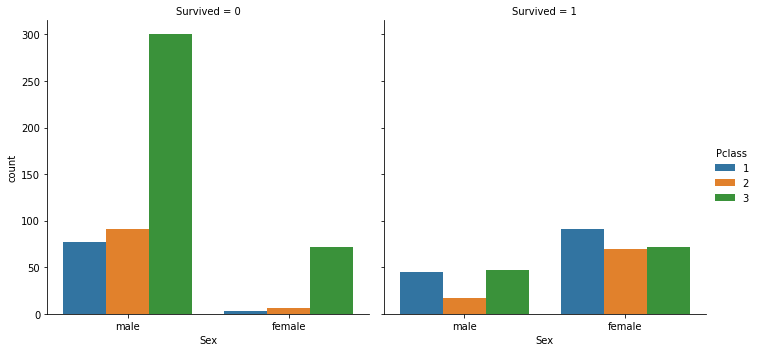

In [ ]:
sns.catplot(x='Sex',
            hue='Pclass',
            col='Survived', 
            data=titanic_train,
            kind='count')

As we can see female at the first class (Pclass=1) has the highest chance of survivability. While male at the third class has the lowest chance of survivability. So far, female on the first class has the highest chance of survivability.


### Histplot Age vs Survived

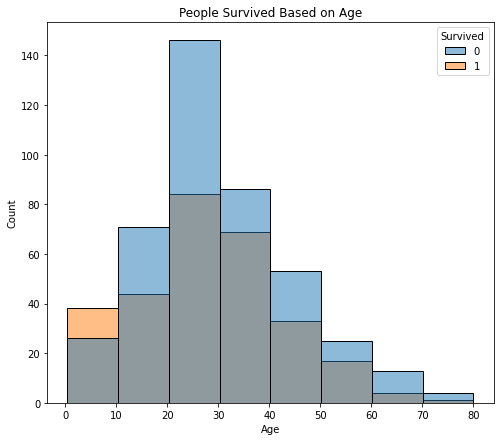

In [ ]:
# Histplot Age vs Survived
plt.figure(figsize=[8,7])
plt.title('People Survived Based on Age')
hist_age_vs_survived = sns.histplot(x='Age',
                                    data=titanic_train ,
                                    hue='Survived',
                                    multiple='layer',
                                    bins=8)
plt.show()

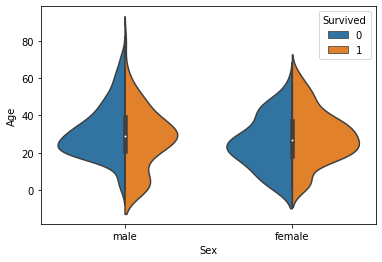

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic_train, split = True)

As we can see reasonable age that mostly survived the titanic is in range 20-30. People with younger age tend to survive rather that the old people.

Female in range of 20-45 years has high chance or survival. Male Children has a high chance of survival.

Based on https://med.libretexts.org/Courses/American_Public_University/APUS%3A_An_Introduction_to_Nutrition_(Byerley)/Text/12%3A_Maternal_Infant_Childhood_and_Adolescent_Nutrition/12.02%3A_The_Human_Life_Cycle#:~:text=The%20major%20stages%20of%20the%20human%20lifecycle%20include%20pregnancy%2C%20infancy,age%2C%20and%20the%20senior%20years.

The major stages in human lifecycle are defined as follows:
1. Pregnancy. The development of a zygote into an embryo and then into a fetus in preparation for childbirth (**Won't be used**).
2. Infancy: 0-1 year
3. Toddler years: 2 - 3 years
4. Childhood: 4 - 8 years 
5. Puberty: 9 - 13 years
6. Older adolescence: 14 - 18 years
7. Adulthood: 19 - 30 years
8. Middle age: 31 - 50 years
9. Senior years: >= 51 years

In [ ]:
stages = ['infancy', 'toddler', 'childhood', 'puberty', 
                'older adolescence', 'adulthood', 'middle age', 
                'senior years']

def grouped_ages(data):
  if data <= 1:
    return 'infancy'
  elif data <= 3:
    return 'toddler'
  elif data <= 8:
    return 'childhood'
  elif data <= 13:
    return 'puberty'
  elif data <= 18:
    return 'older adolescence'
  elif data <= 30:
    return 'adulthood'
  elif data <= 50:
    return 'middle age' 
  else:
    return 'senior years'




### Histplot Embarked vs Survived

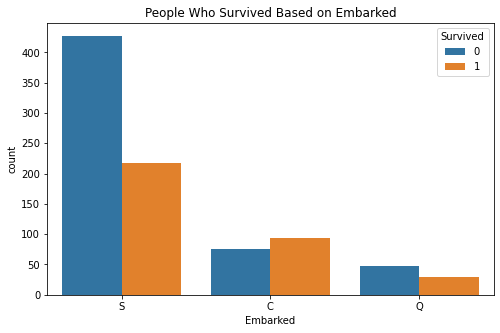

In [ ]:
plt.figure(figsize=[8,5])
plt.title('People Who Survived Based on Embarked')
sns.countplot(x='Embarked', data=titanic_train, hue='Survived')

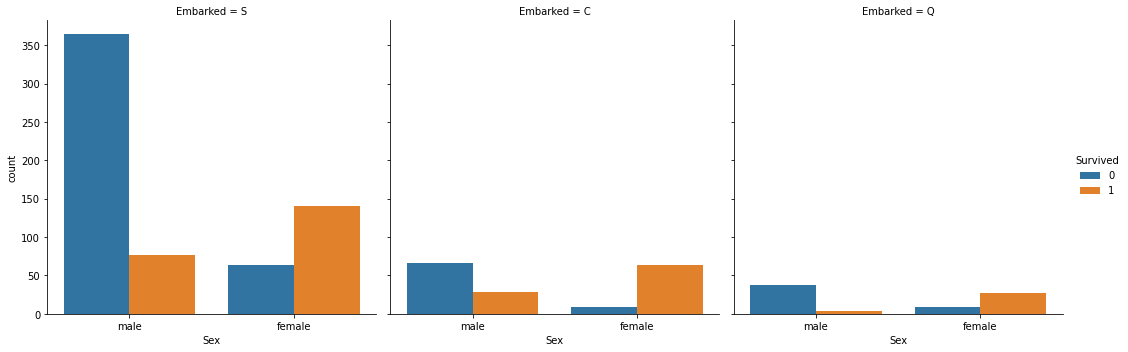

In [ ]:
sns.catplot(kind='count', 
            data=titanic_train, 
            col='Embarked', 
            x='Sex', 
            hue='Survived')

Male and female who embarked from S has higher percentage for surviving the titanic accident

### Factor Plot Correlation of Survivability From Traveling with Accompanied or Not.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


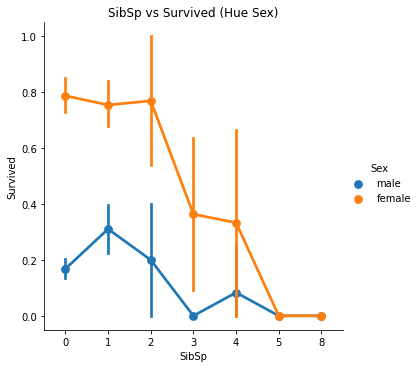

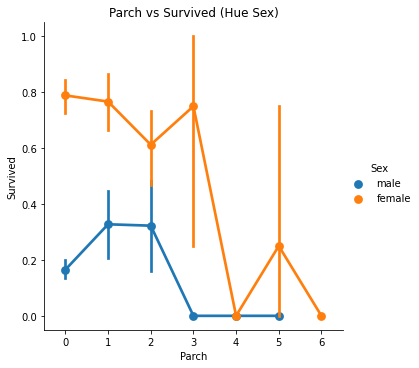

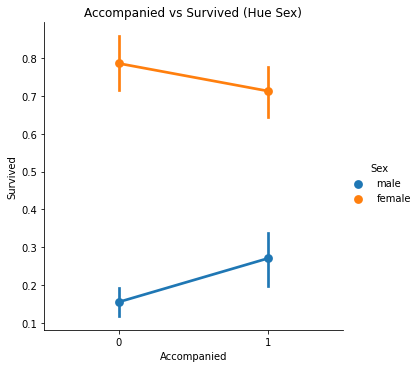

In [ ]:
# Adding new column 'Accompanied' which has a meaning if the person travelling alone or not
bool_sibsp = titanic_train['SibSp'] > 0
bool_parch = titanic_train['Parch'] > 0
titanic_train['Accompanied'] = 0
titanic_train.loc[bool_sibsp | bool_parch, 'Accompanied'] = 1

sns.factorplot(x='SibSp', y='Survived', hue='Sex', data=titanic_train)\
.set(title='SibSp vs Survived (Hue Sex)')
sns.factorplot(x='Parch', y='Survived', hue='Sex', data=titanic_train)\
.set(title='Parch vs Survived (Hue Sex)')
sns.factorplot(x='Accompanied', y='Survived', hue='Sex', data=titanic_train)\
.set(title='Accompanied vs Survived (Hue Sex)')
plt.show()


From above, we can conclude that female who is accompanied is prioritized when the accident happened.

From Female who traveled alone has a low change of survival because there's no sibling, spouse, etc. to help them.


### Bar Plot and Histogram Plot on Survivability Based on Fare

In [ ]:
# Split Fare into 4 quantile
titanic_train['FareBins'] = pd.qcut(titanic_train['Fare'], 4)

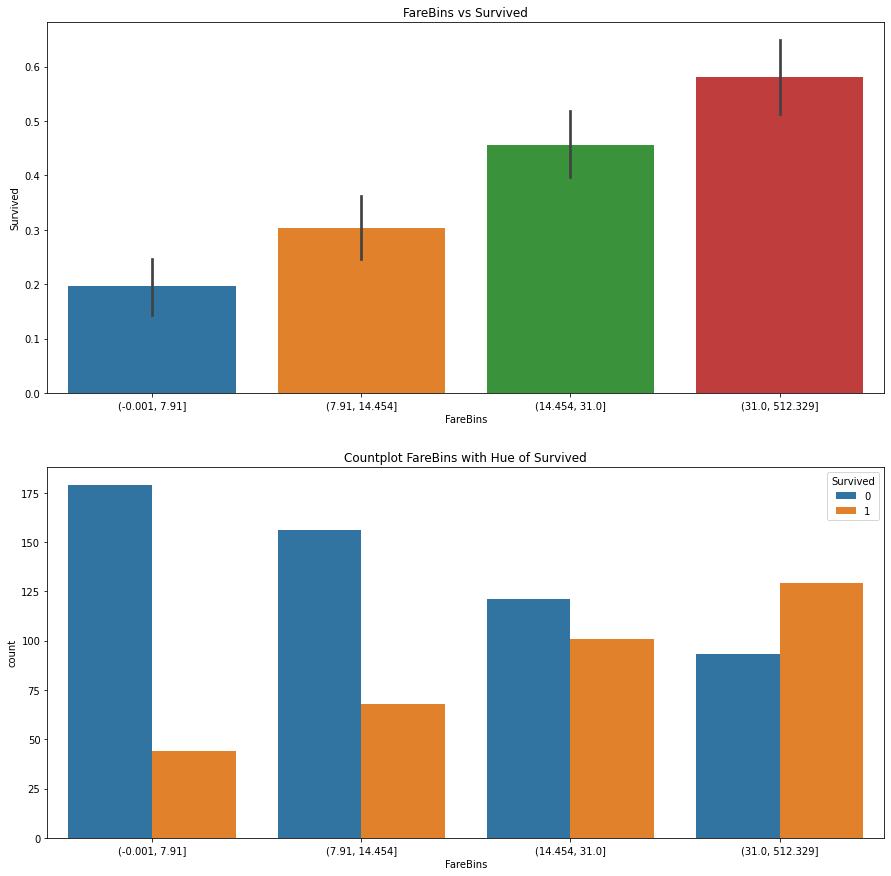

Pclass,1,2,3
Survived,,,
0,64.684008,19.412328,13.669364
1,95.608029,22.055700,13.694887


In [ ]:
fig, ax = plt.subplots(figsize=(15,15), nrows=2, ncols=1)

ax[0].set_title('FareBins vs Survived')
sns.barplot(x='FareBins', y='Survived', 
            data=titanic_train, ax=ax[0])

ax[1].set_title('Countplot FareBins with Hue of Survived')
sns.countplot(x='FareBins', hue='Survived', 
              data=titanic_train, ax=ax[1])
plt.show()

display(pd.pivot_table(titanic_train, index='Survived', columns='Pclass', values='Fare', aggfunc='mean'))

People who pay a lot for the ticket has a high survival rate. We can see that the mean for each people who survived has a higher Fare than those who not survived.

### Plot Survivability Based on Ticket

In [ ]:
titanic_train['TicketCode'] = titanic_train['Ticket'].apply(lambda x: x.split(' ')[0].replace('.', '').replace('/', ''))\
    .apply(lambda x: 'n' if x.isnumeric() else x)\
    .str.lower()

In [ ]:
np.sort(titanic_train['TicketCode'].unique())
tickets_type = ['a', 'c', 'fa', 'fc', 'line', 'n', 'p', 'sc', 
                'so', 'sp', 'sotono', 'sp','stono', 'sw', 'w']

for t in tickets_type:
  titanic_train.loc[titanic_train['TicketCode'].str.match(f'^({t}.*)'), 'TicketCode']=t


In [ ]:
titanic_train['TicketCode'].unique()

array(['a', 'p', 'stono', 'n', 'c', 'sc', 'sp', 'so', 'w', 'fa', 'line',
       'fc', 'sw'], dtype=object)

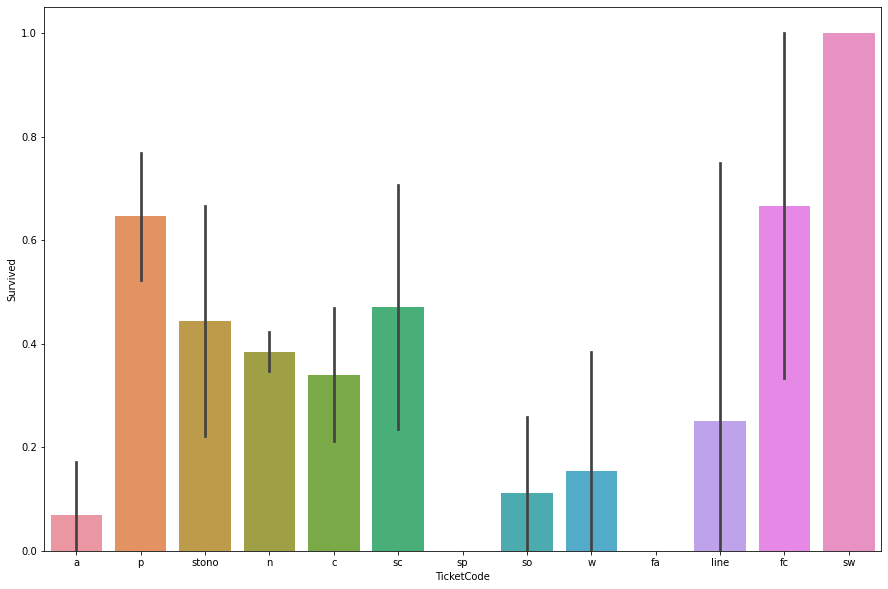

Survived,0,1
TicketCode,,
a,27.0,2.0
c,31.0,16.0
fa,1.0,NaN
fc,2.0,4.0
line,3.0,1.0
n,407.0,254.0
p,23.0,42.0
sc,9.0,8.0
so,24.0,3.0


Survived,0,1
TicketCode,,
a,10.117900,8.050000
c,33.716129,17.910419
fa,7.312500,NaN
fc,39.125000,21.000000
line,0.000000,0.000000
n,18.956376,40.229446
p,81.278074,132.051983
sc,21.733333,24.959387
so,21.686458,8.866667


In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='TicketCode', y='Survived', data=titanic_train)
plt.show()

display(pd.pivot_table(titanic_train, index='TicketCode', columns='Survived', values='PassengerId', aggfunc='count'))
display(pd.pivot_table(titanic_train, index='TicketCode', columns='Survived', values='Fare', aggfunc='mean'))

Looks like ticket code didn't provide enough evidence whether those with expensive ticket fare survive the titanic.

In [ ]:
titanic_train['Cabin Code'] = titanic_train['Cabin'].apply(lambda x: str(x).split(' ')[0][0]).str.lower()
titanic_train['Cabin Count'] = titanic_train['Cabin'].apply(lambda x: len(str(x).split(' ')))

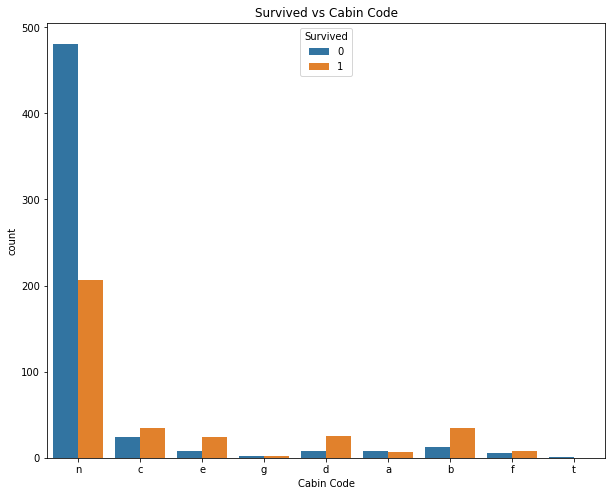

In [ ]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Code')
sns.countplot(x='Cabin Code', data=titanic_train, hue='Survived')

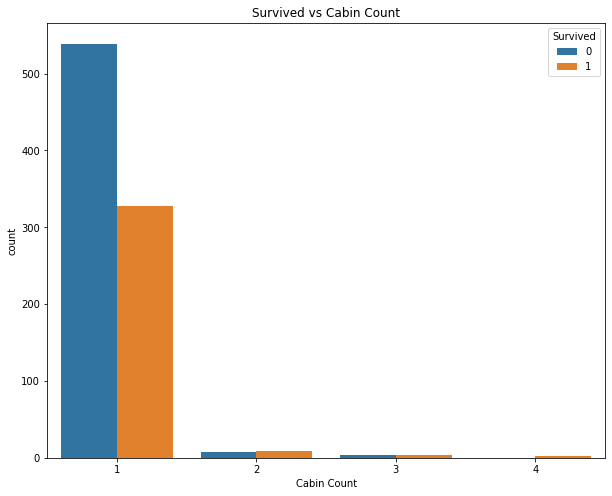

Survived,0,1
Cabin Count,,
1,539.0,328.0
2,7.0,9.0
3,3.0,3.0
4,NaN,2.0


Survived,0,1
Cabin Count,,
1,20.332002,42.060481
2,93.252971,132.479156
3,177.000000,346.109733
4,NaN,262.375000


In [ ]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='Cabin Count', data=titanic_train, hue='Survived')
plt.show()
display(pd.pivot_table(titanic_train, index='Cabin Count', columns='Survived', values='Fare', aggfunc='count'))
display(pd.pivot_table(titanic_train, index='Cabin Count', columns='Survived', values='Fare', aggfunc='mean'))

Looks like people with multiple cabins (rich) most likely to survive but this doesn't ensure that. for example 4 cabins (all of them survive maybe they are a VIP that needs to be saved first) but others with 2 and 3 cabin has a slighly little change to survive

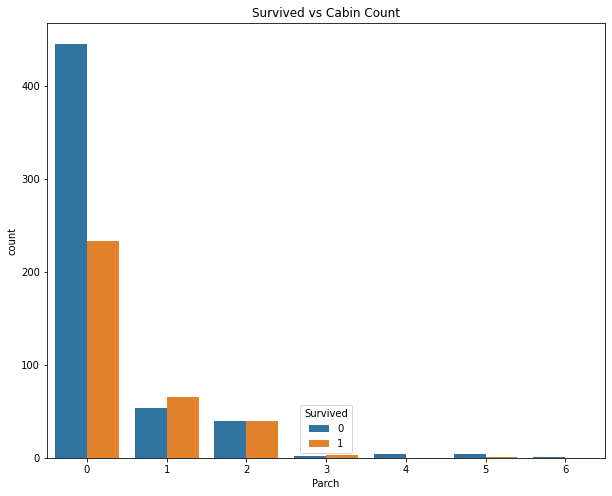

In [ ]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='Parch', data=titanic_train, hue='Survived')
plt.show()

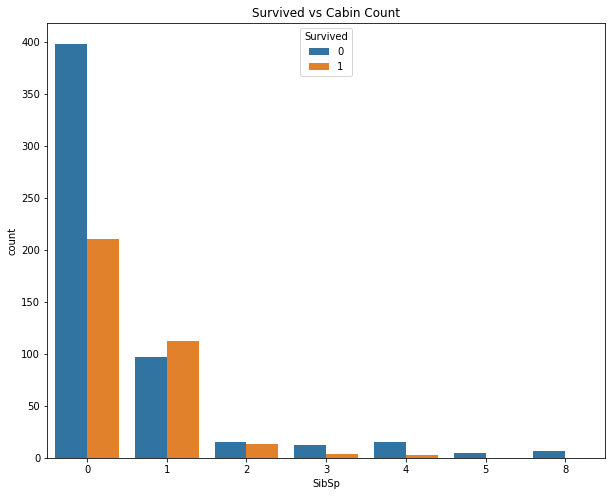

In [ ]:
plt.figure(figsize=[10,8])
plt.title('Survived vs Cabin Count')
sns.countplot(x='SibSp', data=titanic_train, hue='Survived')
plt.show()

One thing for sure that people who are travelling alone tend to survive because they only need to save themselves without worying others

In [ ]:
titanic_train['title'] = titanic_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

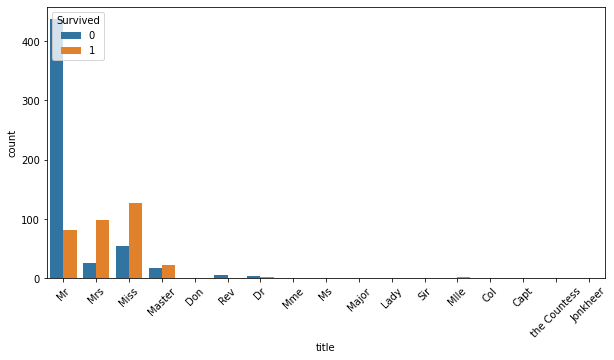

In [ ]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(x='title', hue='Survived',data=titanic_train)

In [ ]:
print('Master = ', titanic_train['title'].isin(['Master']).sum())
print('Mr = ', titanic_train['title'].isin(['Mr']).sum())
print('Mrs = ', titanic_train['title'].isin(['Mrs']).sum())
print('Miss = ', titanic_train['title'].isin(['Miss']).sum())

Master =  40
Mr =  517
Mrs =  125
Miss =  182


We are going to change the title to a number where 'Mr' corresponds to 0, 'Mrs' corresponds to 1, 'Miss' corresponds to 2, 'Master' corresponds to 3 and others corresponds to 4

# Data Preprocessing 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
titanic_all = titanic_all_ori.copy()
# Columns to be dropped
if 'Cabin' in titanic_all.columns:
    titanic_all.drop(labels=['Cabin'], axis=1, inplace=True)
    
# Replace title with numbers
embarked = {'S': 0, 'C':1, 'Q':2}
sex = {'male': 0, 'female': 1}
title = {'Master': 0, 'Mr': 1, 'Mrs': 2, 'Miss': 3}

#check mode of embarked for preprocessing
print(titanic_all['Embarked'].mode()[0])

S


In [ ]:
titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


In [ ]:
# convert Age columns into bins which each bin contain range of ages with difference of 10
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

def encode_age(data):
    if (data>0 and data<=10):
        return 0
    if (data>10 and data<=20):
        return 1
    if (data>20 and data<=30):
        return 2
    if (data>30 and data<=40):
        return 3
    if (data>40 and data<=50):
        return 4
    if (data>50 and data<=60):
        return 5
    if (data>60 and data<=70):
        return 6
    else:
        return 7

# encode title to 0 for 'Master', 1 for 'Mr', 2 for 'Mrs', 3 for 'Miss' and lastly 4 for 'Others'
def encode_title(data):
  if data in title.keys():
    return title[data]
  else:
    return len(title)

In [ ]:
titanic_all['Embarked'].mode()[0]

'S'

In [ ]:
#fill embarked column with missing values and map it to number
encoder = LabelEncoder()

# Fill the missing value with the most frequent values inside the dataset which is 'S'
titanic_all['Embarked'].fillna(titanic_all['Embarked'].mode()[0], inplace=True)
titanic_all['Embarked'] = encoder.fit_transform(titanic_all['Embarked'])

#map sex column to number
titanic_all['Sex'] = encoder.fit_transform(titanic_all['Sex'])

#create title column and change it to number
titanic_all['Title'] = titanic_all['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# titanic_all['Title'] = encoder.fit_transform(titanic_all['Title'])
titanic_all['Title'] = titanic_all['Title'].apply(lambda x: encode_title(x))

#fill numeric missing value with mean of its column
titanic_all['Age'] = titanic_all['Age'].fillna(titanic_all['Age'].mean())
titanic_all['Age'] = titanic_train['Age'].apply(lambda x: encode_age(x))
titanic_all['Fare'] = titanic_all['Fare'].fillna(titanic_all['Fare'].mean())

X = titanic_all[titanic_all['train_test'] == 0]\
[['Pclass','Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Embarked', 'Sex']]
y = titanic_all[titanic_all['train_test'] == 0]['Survived']

# Submission
X_submit = titanic_all[titanic_all['train_test'] == 1]\
[['Pclass','Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Embarked', 'Sex']]

In [ ]:
titanic_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2,1,0,A/5 21171,7.2500,2,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,0,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,2,0,3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,2,0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,2,0,1


In [ ]:
from sklearn.model_selection import train_test_split
# Splot the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.82956755, -0.26690459,  0.5138115 , ..., -0.62266185,
         0.58489231,  0.74242727],
       [-0.37094484, -0.26690459, -0.66256323, ..., -0.62266185,
         0.58489231,  0.74242727],
       [-1.57145722, -0.26690459,  3.95539858, ..., -0.62266185,
         0.58489231,  0.74242727],
       ...,
       [ 0.82956755,  1.25338396,  0.0532047 , ...,  0.43039097,
         0.58489231, -1.34693328],
       [-1.57145722,  1.25338396,  0.13909685, ..., -0.62266185,
         0.58489231,  0.74242727],
       [-1.57145722, -0.26690459, -0.10973011, ..., -0.62266185,
         0.58489231,  0.74242727]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
models = [RandomForestClassifier(), 
          KNeighborsClassifier(), 
          SVC(), 
          LogisticRegression(), 
          DecisionTreeClassifier()]
df_models = pd.DataFrame(columns=['Model', 'Accuracy'])

for m in models:
    m.fit(X_train, y_train)
    df_models = df_models.append({'Model': m.__class__.__name__, 
                                  'Accuracy': m.score(X_train, y_train)}, 
                                  ignore_index=True)

df_models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.952247
4,DecisionTreeClassifier,0.952247
1,KNeighborsClassifier,0.855337
2,SVC,0.853933
3,LogisticRegression,0.807584


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
model = RandomForestClassifier()
parameters = {
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 3, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [50,100, 200, 400, 600, 800, 1000]
}
model_cv = RandomizedSearchCV(model, param_distributions=parameters, cv=5, scoring='accuracy')


In [ ]:
model_cv.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
confusion_matrix(y_test, model_cv.best_estimator_.predict(X_test))

In [ ]:
model_cv.best_score_

In [ ]:
prediction = model_cv.best_estimator_.predict(X_submit)

In [ ]:
submit = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': prediction.astype(int)})

In [ ]:
submit

The test score on the kaggle competition is 0.77 which is not bad but there are some things that can be improved